# Programa de Ajuste Lineal por Mínimos Cuadrados

### Importamos los paquetes necesarios

In [15]:
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Latex
import pandas as pd
pd.set_option('precision', 2)

La función de ajuste $y_i = a + b x_i$  pide tres listas de argumentos $\{ x_i, y_i \}$, y $\sigma_i = \sigma (y_i)$ donde  $i=1,...,n$ 

La minimización conduce al problema algebráico 
$$\left( \begin{array}{c} a \\ b \end{array} \right) = H^{-1} Z$$
donde
$$
H = \left( \begin{array}{cc} \sum_i \frac{1}{\sigma_i^{2}} & \sum_i \frac{x_i}{\sigma_i^2} \\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x^2_i}{\sigma_i^2}
\end{array}
\right) ~~~; ~~~~  
Z = \frac{1}{\Delta}\left( \begin{array}{c} \sum_i\frac{x_i^2}{\sigma_i^2} \\  
 \sum_i\frac{1}{\sigma_i^2} \end{array}
\right)
$$
con $\Delta= \det H$.
Además, las desviaciones estándar de $a$ y $b$ son 
$$
\sigma(a) =\sqrt{ \frac{1}{\Delta} \sum_i \frac{x_i^2}{\sigma_i^2}} ~~~; ~~~
\sigma(b) =\sqrt{ \frac{1}{\Delta} \sum_i \frac{1}{\sigma_i^2}}\, .
$$

In [16]:
def media(xlist):
    return sum(xlist)/len(xlist)

def sigma(xlist):
    return np.sqrt(sum((xlist-media(xlist))**2)/(1.*len(xlist)*(len(xlist)-1.)))

def sigmab(xlist):
    return np.sqrt(sum((xlist-media(xlist))**2)/(1.*len(xlist)*(len(xlist)-1)))

def utotal(ua,ub):
    return np.sqrt(ua**2+ub**2)

#ajuste lineal y=a+bx
def ajustelinealponderado(x,y,sig):

    H=np.array([[sum(1./sig**2),sum(x/sig**2)],[sum(x/sig**2),sum(x**2/sig**2)]])
    Delta=det(H)
    Z=np.array([sum(y/sig**2),sum((x*y)/sig**2)])
    
    ([a,b])=np.matmul(inv(H),Z)
    
    siga=np.sqrt(sum(x**2/sig**2)/Delta)
    sigb=np.sqrt(sum(1./sig**2)/Delta)
    
    return a,b,siga,sigb


### En esta celda introducimos nuestros datos $\{ x_i, y_i \}$, $i=1,...,n$

esta celda hace uso de la función DataFrame de la librería Panda

In [17]:
x=np.array([ 25., 16., 11.1111, 8.16327, 6.25, 4.93827, 4., 2.77778, 1.77778, 1.  ])
y=np.array([ 901., 652., 443., 339., 283., 281., 240., 220., 180., 154.  ])
n=len(x)

datos = pd.DataFrame({'x': x, 'y': y},index=np.arange(n)+1)
display(datos)

,x,y
1,25.00,901.0
2,16.00,652.0
3,11.11,443.0
4,8.16,339.0
5,6.25,283.0
6,4.94,281.0
7,4.00,240.0
8,2.78,220.0
9,1.78,180.0
10,1.00,154.0


otra manera de representarlos con LaTex

In [7]:
cadena  = '\\begin{array}{|r|r|} \hline x & y \\\\ \hline'
for i in range(10):
    cadena += '%3.2f & %3.2f \\\\' % (x[i],y[i])
cadena += '\hline \end{array}'

display(Latex(cadena))

<IPython.core.display.Latex object>

calculemos la media $\bar y = \frac{1}{n}(\sum_{i=1}^n y_i)$, y la desviación estándar de la media poblacional, que es aproximada por el estimador   $u_A=\sigma(\bar y) = \sqrt{\frac{\sum_{i=1}^n (y_i - \bar y)^2}{n(n-1)}}$

In [8]:
ymed=media(y)
display(Latex(r'$ \bar{y} =%i $' % ymed))

<IPython.core.display.Latex object>

In [9]:
sigbar=sigmab(y)
display(Latex(r'$\sigma(\bar y)=%i $' % sigbar))

<IPython.core.display.Latex object>

en caso de ser conocida, la desviación estándar de cada dato es  $\sigma(y_i)$. En el ejemplo 3.18 del manual   $\sigma(y_i) = \sqrt{y_i}$ 

In [10]:
sigi=np.sqrt(y)

escogemos cuál de las dos es la que vamos a usar en el ajuste sigma = sigbar o sigma = sigi

In [11]:
uy=sigi

In [12]:
datossig = pd.DataFrame({'x': x,'y': y ,'sig': uy},index=np.arange(n)+1)
display(datossig)

,sig,x,y
1,30.02,25.00,901.0
2,25.53,16.00,652.0
3,21.05,11.11,443.0
4,18.41,8.16,339.0
5,16.82,6.25,283.0
6,16.76,4.94,281.0
7,15.49,4.00,240.0
8,14.83,2.78,220.0
9,13.42,1.78,180.0
10,12.41,1.00,154.0


### Llamamos a la funcion de ajuste

In [13]:
a,b,siga,sigb = ajustelinealponderado(x,y,uy)

display(Latex('$a$=%3.2f , $\sigma_{a}$=%3.2f' % (a,siga) ))
display(Latex('$b$=%3.2f , $\sigma_{b}$=%3.2f' % (b,sigb) ))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Graficamos los datos y la curva obtenida

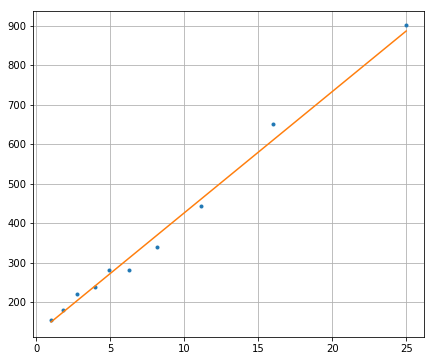

In [14]:
Y= a + b*x

plt.figure(figsize=(7,6))
plt.plot(x,y, '.')
plt.plot(x,Y)
plt.grid()
plt.show()

también podemos graficar con las barras de error

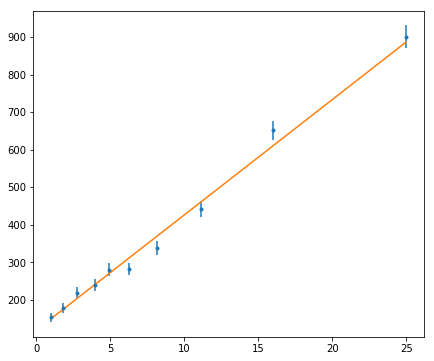

In [15]:
plt.figure(figsize=(7,6))
plt.errorbar(x, y, fmt= '.', yerr=uy)
plt.plot(x,Y)

plt.show()